In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

class color:
    BOLD='\033[1m'
    END='\033[0m'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#One second interval between queries to stay within API query limits
time.sleep(1)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_list = []
index_counter = 0
m = 1 
set_number = 1

print("Beginning Data Retrieval")
print("--------------------------")
#mention cities one by one by using enumerate.
#can run data for 50 cities at a time so that API Calls do not time out. 
for n, city in enumerate(cities):
    
    #print("n =", n)
    #print("m =", m)
    if (n % 50 == 0 and n >= 50):
        set_number=set_number+1
        index_counter = 0
    # Get weather data
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    time.sleep(1)
    
    index_counter = index_counter + 1
    print(f"Processing Record {index_counter} of Set {set_number} | {city}")

    try:
        weather_json = weather_response.json()
        temperature = weather_json["main"]["temp"]
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        cloudiness = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        max_temp = weather_json["main"]["temp_max"]
        wind_speed = weather_json["wind"]["speed"]
        city_name = weather_json["name"]
        city_list.append({"Temperature": temperature,
                          "Latitude": latitude,
                          "Longitude": longitude,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Maximum Temperature": max_temp,
                          "Wind Speed": wind_speed,
                          "City Name": city_name})


      
    except: 
        print("City " + color.BOLD + "not " + color.END + "found. Skipping...")
        pass
    
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")


Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | krasnoselkup
Processing Record 6 of Set 1 | sanandaj
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | dawlatabad
Processing Record 10 of Set 1 | fukue
Processing Record 11 of Set 1 | yar-sale
Processing Record 12 of Set 1 | valdivia
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | port-de-bouc
Processing Record 15 of Set 1 | bubaque
Processing Record 16 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | cibitoke
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | sechura
Processing Record 22

Processing Record 36 of Set 4 | nagua
Processing Record 37 of Set 4 | saint anthony
Processing Record 38 of Set 4 | provideniya
Processing Record 39 of Set 4 | margate
Processing Record 40 of Set 4 | catuday
Processing Record 41 of Set 4 | talas
Processing Record 42 of Set 4 | okhotsk
Processing Record 43 of Set 4 | manaure
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | melioratorov
Processing Record 46 of Set 4 | verkhnevilyuysk
Processing Record 47 of Set 4 | luorong
Processing Record 48 of Set 4 | itupiranga
Processing Record 49 of Set 4 | sao joao da barra
Processing Record 50 of Set 4 | alofi
Processing Record 1 of Set 5 | poum
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 5 | veydelevka
Processing Record 5 of Set 5 | marzuq
Processing Record 6 of Set 5 | istok
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | jalu
Processing Record 9 of Se

Processing Record 24 of Set 8 | saleaula
City not found. Skipping...
Processing Record 25 of Set 8 | san quintin
Processing Record 26 of Set 8 | blagoveshchensk
Processing Record 27 of Set 8 | raga
Processing Record 28 of Set 8 | saldana
Processing Record 29 of Set 8 | grindavik
Processing Record 30 of Set 8 | huinan
Processing Record 31 of Set 8 | owando
Processing Record 32 of Set 8 | mandapam
Processing Record 33 of Set 8 | tautira
Processing Record 34 of Set 8 | burica
City not found. Skipping...
Processing Record 35 of Set 8 | hibbing
Processing Record 36 of Set 8 | victoria
Processing Record 37 of Set 8 | cheney
Processing Record 38 of Set 8 | mundo nuevo
Processing Record 39 of Set 8 | robertsport
Processing Record 40 of Set 8 | saldanha
Processing Record 41 of Set 8 | ahuimanu
Processing Record 42 of Set 8 | puri
Processing Record 43 of Set 8 | bara
Processing Record 44 of Set 8 | mapimi
Processing Record 45 of Set 8 | songjianghe
Processing Record 46 of Set 8 | ostersund
Proce

Processing Record 7 of Set 12 | urosevac
City not found. Skipping...
Processing Record 8 of Set 12 | waingapu
Processing Record 9 of Set 12 | saint-pierre
Processing Record 10 of Set 12 | beeville
Processing Record 11 of Set 12 | mokhsogollokh
Processing Record 12 of Set 12 | geresk
City not found. Skipping...
Processing Record 13 of Set 12 | rio gallegos
Processing Record 14 of Set 12 | bathsheba
Processing Record 15 of Set 12 | san pedro
Processing Record 16 of Set 12 | sisimiut
Processing Record 17 of Set 12 | sao borja
Processing Record 18 of Set 12 | zhitikara
City not found. Skipping...
Processing Record 19 of Set 12 | mehamn
Processing Record 20 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 21 of Set 12 | kambove
Processing Record 22 of Set 12 | kidal
Processing Record 23 of Set 12 | alexandria
Processing Record 24 of Set 12 | whitianga
Processing Record 25 of Set 12 | ratnagiri
Processing Record 26 of Set 12 | moranbah
Processing Record 27 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_data = pd.DataFrame(city_list)
#cities_data.to_csv = ('cities.csv', encoding = "utf-8", index_label = "City_ID")
cities_data.head()

,Temperature,Latitude,Longitude,Cloudiness,Country,Date,Humidity,Maximum Temperature,Wind Speed,City Name
0,68.00,-33.59,26.89,92,ZA,1584216759,88,68.00,1.99,Port Alfred
1,84.20,-21.21,-159.78,37,CK,1584216895,74,84.20,6.93,Avarua
2,57.20,-54.80,-68.30,20,AR,1584216864,50,57.20,9.17,Ushuaia
3,72.09,-28.77,114.60,40,AU,1584216370,88,73.40,10.29,Geraldton
4,31.95,65.70,82.47,100,RU,1584216898,97,31.95,14.45,Krasnosel'kup


In [5]:
cities_data.to_csv('cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
latitude = cities_data["Latitude"]
temperature = cities_data["Temperature"]
humidity = cities_data["Humidity"]
wind_speed = cities_data["Wind Speed"]
cloudiness = cities_data["Cloudiness"]

#### Latitude vs. Temperature Plot

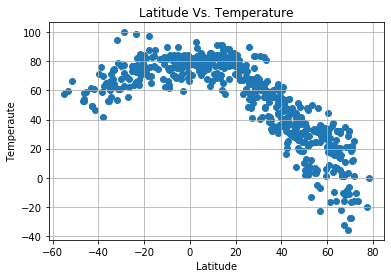

In [7]:
plt.scatter(latitude, temperature, linewidths = 1)
plt.grid(True)
plt.title("Latitude Vs. Temperature")
plt.ylabel("Temperaute")
plt.xlabel("Latitude")
plt.show()

The code is grabbing data for latitude and temperature from over 500 cities. The code is analyzing the relationship between latitude and temperature of the cities. There seems to be an almost but not quite proportional relationship between latitude and temperature. 

#### Latitude vs. Humidity Plot

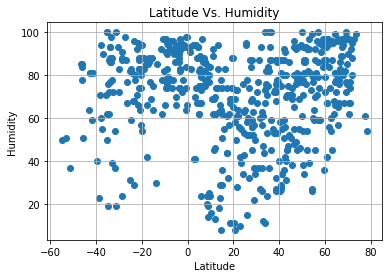

In [8]:
plt.scatter(latitude, humidity, linewidths = 1)
plt.grid(True)
plt.title("Latitude Vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

The code is grabbing data for latitude and humidity from over 500 cities. The code is analyzing the relationship between latitude and humidity of the cities. There does not seem to be proportional relationship between latitude and humidity. 

#### Latitude vs. Cloudiness Plot

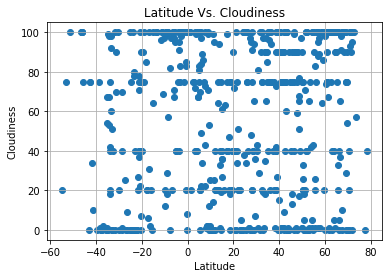

In [9]:
plt.scatter(latitude, cloudiness, linewidths = 1)
plt.grid(True)
plt.title("Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

The code is grabbing data for latitude and cloudiness from over 500 cities. The code is analyzing the relationship between latitude and cloudiness of the cities. There does not seem to be proportional relationship between latitude and cloudiness. 

#### Latitude vs. Wind Speed Plot

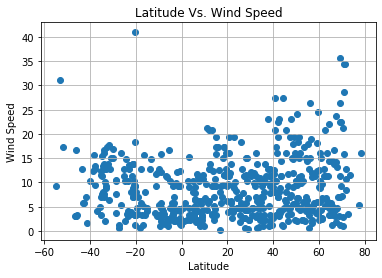

In [10]:
plt.scatter(latitude, wind_speed, linewidths = 1)
plt.grid(True)
plt.title("Latitude Vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

The code is grabbing data for latitude and sind speed from over 500 cities. The code is analyzing the relationship between latitude and wind speed of the cities. There does not seem to be proportional relationship between latitude and wind speed. 

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern = cities_data.loc[(cities_data["Latitude"] >= 0)]
southern = cities_data.loc[(cities_data["Latitude"] < 0)]

latitude_north = northern["Latitude"]
latitude_south = southern["Latitude"]
temperature_north = northern["Maximum Temperature"]
temperature_south = southern["Maximum Temperature"]
humidity_north = northern["Humidity"]
humidity_south = southern["Humidity"]
wind_speed_north = northern["Wind Speed"]
wind_speed_south = southern["Wind Speed"]
cloudiness_north = northern["Cloudiness"]
cloudiness_south = southern["Cloudiness"]

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [12]:
x_values = northern["Latitude"]
y_values = northern["Maximum Temperature"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regression_values = x_values * slope + intercept
print(regression_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

4      11.801878
5      50.397412
7      49.000404
8      53.724832
9      10.366769
         ...    
537    93.552274
539    49.279805
540    88.764345
541    40.580252
542    84.700320
Name: Latitude, Length: 382, dtype: float64
y = -1.27x + 95.24


The r-squared value is -0.884919517811542


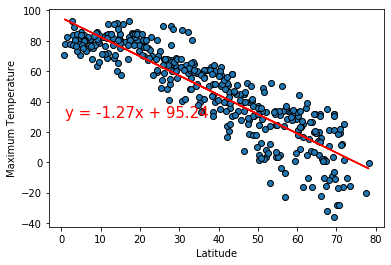

In [13]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regression_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.annotate(line_equation,(1,30),fontsize=15,color="red")

print(f"The r-squared value is {rvalue}")

plt.show()

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
x_values = southern["Latitude"]
y_values = southern["Maximum Temperature"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regression_values = x_values * slope + intercept
print(regression_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

0      67.572299
1      72.837967
2      58.550909
3      69.622422
6      67.219270
         ...    
521    66.194208
523    72.501951
529    80.255838
531    70.587936
538    75.113518
Name: Latitude, Length: 161, dtype: float64
y = 0.43x + 81.86


The r-squared value is 0.5626546288958808


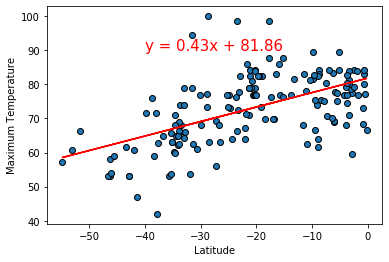

In [15]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regression_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.annotate(line_equation,(-40,90),fontsize=15,color="red")

print(f"The r-squared value is {rvalue}")

plt.show()

In the northern hemisphere the maximum temperature decreases as latitude increases. In the southern hemisphere the maximim temperature increases as latitude increases. The r-value for the northeren hemisphere is close to -1 so there could be a relationship between latitude and maximum temperature. The r-value for the southern hemisphere is not close to 1 so there is less of a relationship between latitude and maximum temperature in the southern hemisphere.

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [16]:
x_values = northern["Latitude"]
y_values = northern["Humidity"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regression_values = x_values * slope + intercept
print(regression_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

4      75.659567
5      66.589015
7      66.917334
8      65.807019
9      75.996840
         ...    
537    56.446950
539    66.851670
540    57.572188
541    68.896200
542    58.527297
Name: Latitude, Length: 382, dtype: float64
y = 0.3x + 56.05


The r-squared value is 0.2724128946564826


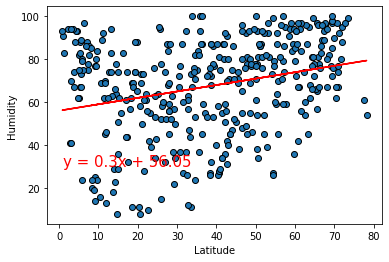

In [17]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regression_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_equation,(1,30),fontsize=15,color="red")

print(f"The r-squared value is {rvalue}")

plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [18]:
x_values = southern["Latitude"]
y_values = southern["Humidity"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regression_values = x_values * slope + intercept
print(regression_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

0      71.960373
1      77.359478
2      62.710374
3      74.062448
6      71.598398
         ...    
521    70.547361
523    77.014947
529    84.965324
531    75.052429
538    79.692693
Name: Latitude, Length: 161, dtype: float64
y = 0.44x + 86.61


The r-squared value is 0.3312454199915582


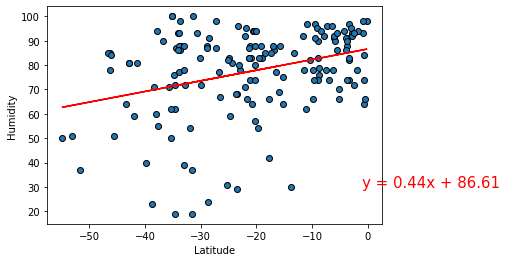

In [19]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regression_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_equation,(-1,30),fontsize=15,color="red")

print(f"The r-squared value is {rvalue}")

plt.show()

On both graphs the humidity increases as the latitude increases. The r-values are close to zero so there really is not a relationship between latitude and humidity.

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [20]:
x_values = northern["Latitude"]
y_values = northern["Cloudiness"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regression_values = x_values * slope + intercept
print(regression_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

4      60.552310
5      53.778273
7      54.023467
8      53.194266
9      60.804191
         ...    
537    46.204012
539    53.974428
540    47.044358
541    55.501317
542    47.757650
Name: Latitude, Length: 382, dtype: float64
y = 0.22x + 45.91


The r-squared value is 0.12124241792245416


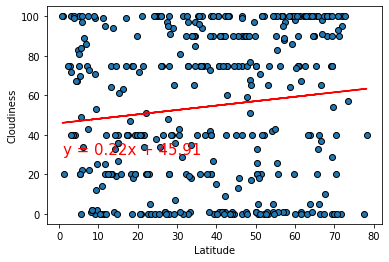

In [21]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regression_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_equation,(1,30),fontsize=15,color="red")

print(f"The r-squared value is {rvalue}")

plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


In [22]:
x_values = southern["Latitude"]
y_values = southern["Cloudiness"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regression_values = x_values * slope + intercept
print(regression_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

0      45.579675
1      56.177472
2      27.423028
3      49.705796
6      44.869160
         ...    
521    42.806099
523    55.501199
529    71.106841
531    51.649011
538    60.757296
Name: Latitude, Length: 161, dtype: float64
y = 0.86x + 74.33


The r-squared value is 0.2976504368805993


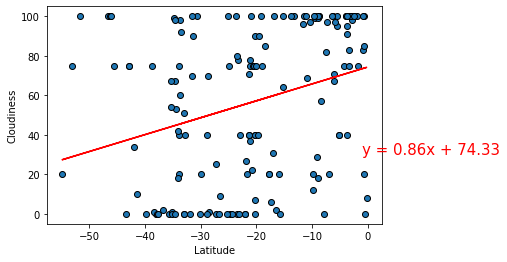

In [23]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regression_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_equation,(-1,30),fontsize=15,color="red")

print(f"The r-squared value is {rvalue}")

plt.show()

In the northern hemisphere graph the points seem all scattered everywhere. In the southern hemisphere graph cloudiness seems to increase as latitude increses. Both of the r-values for the northern and southern hemisphere are low or close to zero so there is no relationship between latitude and cloudiness.


Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [24]:
x_values = northern["Latitude"]
y_values = northern["Wind Speed"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regression_values = x_values * slope + intercept
print(regression_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

4      10.647200
5       8.759855
7       8.828169
8       8.597142
9      10.717378
         ...    
537     6.649555
539     8.814506
540     6.883688
541     9.239920
542     7.082421
Name: Latitude, Length: 382, dtype: float64
y = 0.06x + 6.57


The r-squared value is 0.19942848856603967


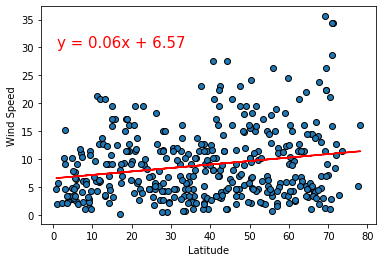

In [25]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regression_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_equation,(1,30),fontsize=15,color="red")

print(f"The r-squared value is {rvalue}")

plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [26]:
x_values = southern["Latitude"]
y_values = southern["Wind Speed"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)
regression_values = x_values * slope + intercept
print(regression_values)
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_equation)

0       9.902777
1       8.240931
2      12.749930
3       9.255757
6      10.014193
         ...    
521    10.337703
523     8.346977
529     5.899848
531     8.951041
538     7.522766
Name: Latitude, Length: 161, dtype: float64
y = -0.13x + 5.39


The r-squared value is -0.31616305543936574


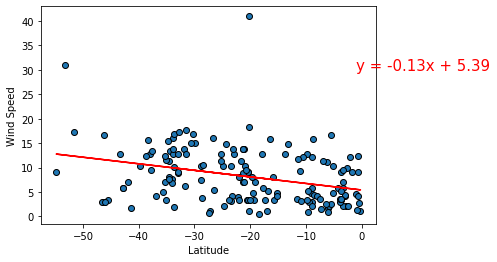

In [27]:
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regression_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_equation,(-1,30),fontsize=15,color="red")

print(f"The r-squared value is {rvalue}")

plt.show()

In the northern hemipshere graph the wind speed seems to stay almost the same as latitude increases. In the southern hemisphere graph the wind speed seems to decrease slightly as latitude increases. Both of the r-values are close to zero which means that there is no relationship between latitude and wind speed.
